In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df_canada.drop(['Type','Coverage','AREA','REG','DEV'],axis=1,inplace=True)
df_canada.rename(columns={'OdName':'country','AreaName':'continent','RegName':'region'},inplace=True)
df_canada.set_index('country',inplace=True)
df_canada['total']=df_canada.sum(axis=1)
df_canada.head(1)

,continent,region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639


In [2]:
years=list(range(1980,2014))
df_total = pd.DataFrame(df_canada[years].sum(axis=0))
df_total.index = map(int,df_total.index)
df_total.reset_index(inplace=True)
df_total.columns=['year','total']
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Text(0, 0.5, 'Total of immigrants')

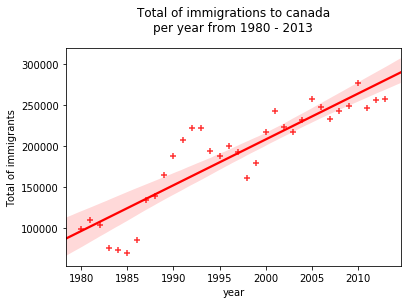

In [11]:
import seaborn as sns
# Generating a regression plot (scatter type)
ax = sns.regplot(x='year',y='total',data=df_total,color='red',marker='+')
ax.set_title('Total of immigrations to canada\nper year from 1980 - 2013',y=1.05)
ax.set_ylabel('Total of immigrants')